Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


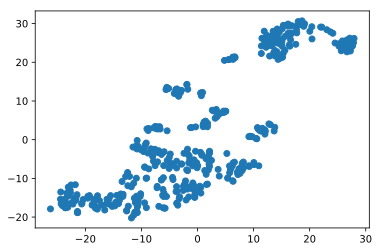

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston

boston = load_boston()
data = boston.data
X = pd.DataFrame(data, columns=boston.feature_names)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, boston.target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

,Кластер,price_av,CRIM_av
0,0,27.788372,0.073566
1,1,16.165354,10.797028
2,2,24.958115,0.421660


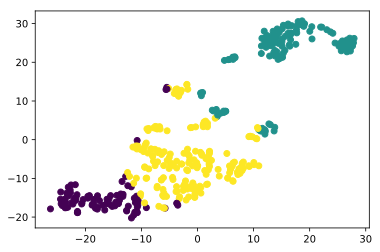

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels = kmeans.fit_predict(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels)
out_table = pd.DataFrame(columns=['Кластер', 'price_av', 'CRIM_av'])
out_table['Кластер'] = np.unique(labels)
y_train = pd.DataFrame(y_train, columns=['Price'])
out_table['price_av'] = [y_train[labels == _].values.mean() for _ in out_table['Кластер']]
out_table['CRIM_av'] = [X_train['CRIM'][labels == _].values.mean() for _ in out_table['Кластер']]
out_table

* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [72]:
labels_test = kmeans.predict(X_test_scaled)
out_table2 = pd.DataFrame(columns=['Кластер', 'price_av', 'CRIM_av'])
out_table2['Кластер'] = np.unique(labels_test)
y_test = pd.DataFrame(y_test, columns=['Price'])
out_table2['price_av'] = [y_test[labels_test == _].values.mean() for _ in out_table2['Кластер']]
out_table2['CRIM_av'] = [X_test['CRIM'][labels_test == _].values.mean() for _ in out_table2['Кластер']]
out_table2

,Кластер,price_av,CRIM_av
0,0,31.350000,0.062060
1,1,16.437143,10.165531
2,2,21.860784,0.266079
